# **Algoritma Nearest Neighbour (k-NN)**
***
Algoritma ini menentukan suatu data akan diklasifikasikan ke kelas mana, dilihat dengan mencari jarak terdekatnya dari k-buah dataset train. kNN termasuk instance learning atau membutuhkan data untuk mengambil sebuah keputusan.

# K-NN Methodology

## Load Dataset
Dataset yang digunakan disini adalah dataset spesies bunga Iris yang terdiri dari Iris-setosa, Iris-versicolor, dan Iris-virginica

In [19]:
# import library
import numpy as np                                # import numpy untuk array
import pandas as pd                               # import pandas untuk operasi dataframe/tabel
import matplotlib.pyplot as plt                   # import plt untuk visualisasi data
from matplotlib.ticker import NullFormatter       # import nullformater untuk logit scale
import itertools                                  # import itertools untuk mengiterasi struktur data
import matplotlib.ticker as ticker                # import ticker 
from sklearn import preprocessing                 # import untuk preprocessing data
%matplotlib inline

In [2]:
# Load dataset
url = 'https://raw.githubusercontent.com/achmatim/data-mining/main/Dataset/iris.csv'  # buat variabel berisi link dataset
df = pd.read_csv(url)                                                                 # import data csv dari url menjadi tabel dengan pandas
df.head()                                                                             # tampilkan bagian awal tabel

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Analisis Dataset
Dalam menganalisis dataset bisa dengan menampilkan jumlah anggota dari tiap kelasnya, ukuran data feature dan label, bisa juga dengan melakukan visualisasi dari dataset yang telah diload sebelumnya.

In [3]:
# Tampilkan jumlah data unik label atau jumlah tiap kelasnya
df['Label'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Label, dtype: int64

Didapatkan bahwa tiap label datanya memiliki jumlah 50 anggota.

Setelah itu bisa dibuat visualisasi datanya.

Text(0.5, 1.0, 'Petal Width')

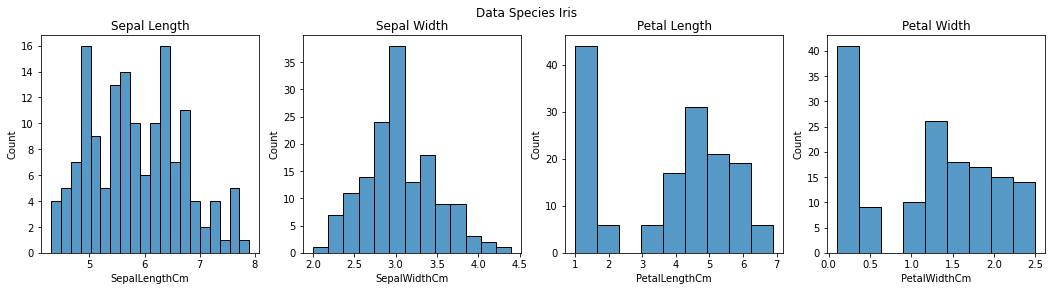

In [13]:
# Visualisasi Data
import seaborn as sns

sepal_length = df['SepalLengthCm']                     # buat variabel yang memuat semua data pada tiap fitur
sepal_width = df['SepalWidthCm']
petal_length = df['PetalLengthCm']
petal_width = df['PetalWidthCm']

fig, axes = plt.subplots(1, 4, figsize=(18, 4))       # buat subplot dengan pembagian 1x4
fig.suptitle('Data Species Iris')                     # buat judul grafiknya

sns.histplot(ax=axes[0], x=sepal_length, bins=20)     # visualisasi dengan histogram data sepal length, bins = ukuran barplotnya
axes[0].set_title('Sepal Length')
sns.histplot(ax=axes[1], x=sepal_width)               # visualisasi dengan histogram data sepal width
axes[1].set_title('Sepal Width')
sns.histplot(ax=axes[2], x=petal_length)              # visualisasi dengan histogram data petal length
axes[2].set_title('Petal Length')
sns.histplot(ax=axes[3], x=petal_width)               # visualisasi dengan histogram data petal width
axes[3].set_title('Petal Width')

## Set Feature dan Label
Dilakukan pengelompokan data mana yang termasuk data fitur dan data mana tang termasuk label atau kelasnya.

In [14]:
# Cek nama kolomnya apa saja
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Label'],
      dtype='object')

In [37]:
# Definisikan Feature nya (X)
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values  # mengambil nilai/value dari tiap feature
X[0:5]                                                                             # tampilkan data feature pada 5 baris awal

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [16]:
# Definisikan Label/class nya (y)
y = df['Label'].values    # mengambil nilai pada kolom Label
y[0:5]                    # tampilkan 5 data awal Label

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

## Normalisasi Data
K-NN merupakan metode yang didasarkan pada tingkat kedekatan antar-atribut. Oleh karena itu, sangat disarankan untuk melakukan normalisasi data agar **perhitungan jarak menjadi lebih valid.**

In [55]:
# Dari modul preprocessing, digunakan standard scaler untuk normalisasi Features.
# Kemudian ubah hasil normalisasi menjadi tipe data floating point (float)
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float)) 
X[0:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

## Split Dataset
Split dataset dilakukan dengan memuat pembagian dari dataset menjadi data training dan data testing. Rasio yang diasa digunakan adalah 0.3 atau 30%, yang artinya data training adalah hasil bagi dari 70% dataset sedangkan data testing adalah sisanya yaitu 30%.

In [63]:
# Import train test split packages dari scikit learn 
from sklearn.model_selection import train_test_split

# Split data X (features) dan y (label) menjadi data test dan data train dengan komposisi data test 20% dan randomstate 4
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
print ('Train set:', X_train.shape,  y_train.shape)      # tampilkan ukuran data train features dan labels
print ('Test set:', X_test.shape,  y_test.shape)         # tampilkan ukuran data test features dan labels

Train set: (120, 4) (120,)
Test set: (30, 4) (30,)


## Klasifikasi
Klasifikasi dilakukan menggunakan model k-NN atau k Nearest Neighbour. Digunakan library K Neighbours Clasifier dari Sci-Kit Learn. Pada packages ini harus di define terlebih dahulu nilai k yang diinginkan.

Selanjutnya dilakukan training model KNN dengan menggunakan dataset train.

In [64]:
# Import library KNN dari scikit learn
from sklearn.neighbors import KNeighborsClassifier

# Define nilai k yang ingin digunakan, karena class berjumlah ganjil maka menggunakan k bernilai genap
k = 4          

#Train Model
knn = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)    #  Train KNN model ke data train dengan nilai k yang telah didefine
knn

KNeighborsClassifier(n_neighbors=4)

## Predicting
Prediksi dilakukan dengan menggunakan data testing. Ini dilakukan untuk mengecek performa dari model yang telah dilatih sebelumnya.

In [65]:
# Prediksi hasil data test features ke model yang telah dilatih sebelumnya
yhat = knn.predict(X_test)    
yhat[0:5]                   # Tampilkan 5 data hasil prediksi teratas

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica'], dtype=object)

## Evaluasi Metric
Evaluasi model dilakukan untuk melihat seberapa baik performa dari model yang telah dibuat dan dilatih menggunakan dataset training. Hasil bisa berupa skor akurasi, presisi, recal, maupun f1-score.

In [70]:
# import metrics library dari scikit learn
from sklearn import metrics

# Tampilkan hasil akurasi dari performa model
print("Train set Accuracy: ", metrics.accuracy_score(y_train, knn.predict(X_train)))  # Tampilkan skor akurasi terhadap data train
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))                    # Tampilkan skot akurasi terhadap data test

Train set Accuracy:  0.9666666666666667
Test set Accuracy:  0.9333333333333333


# Find Best K value
Performa dari model **K-NN sangat bergantung dengan nilai K**. Lalu bagaimana memilih nilai K yang terbaik? Jawabnya, kita harus lakukan pengujian.

Kode berikut ini bertujuan untuk melakukan pengujian nilai **k dari k=1 s.d k=10.**

In [87]:
# Define range nilai K yang diinginkan, disini diambil 10 (1 sampai 10)
Ks = 10
mean_acc = np.zeros((Ks-1))   # Membuat array nol dengan panjang 9
std_acc = np.zeros((Ks-1))
ConfustionMx = []

for n in range(1,Ks):                                                   # looping dalam range 1 hingga 9
    
    #Train Model dan Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)  # train model knn dengan data train dengan nilai k sesuai range loopnya
    yhat=neigh.predict(X_test)                                          # prediksi hasil dataset menggunakan model yang telah dilatih
    
    # Buat akurasi dari hasil prediksi terhadap data test
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)                

    # Buat standart deviasi dari akurasi,
    # Nilainya adalah hasil pembagian dari nilai standart deviasi data prediksi dengan akar dari jumlah data hasil prediksi
    std_acc[n-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])              

mean_acc        # panggil list akurasi model dari variasi nilai k

array([0.86666667, 0.9       , 0.9       , 0.9       , 0.93333333,
       0.96666667, 0.96666667, 0.96666667, 0.93333333])

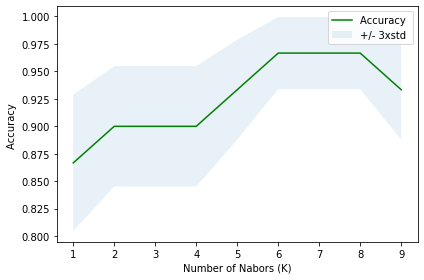

In [91]:
# Visualisasi Performa
plt.plot(range(1,Ks),mean_acc,'g')    # plot list hasil akurasi
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)   # tambahkan sebaran standart deviasi

plt.legend(('Accuracy ', '+/- 3xstd'))    # tampilkan legenda
plt.ylabel('Accuracy ')                   # tambahkan label sumbu y
plt.xlabel('Number of Nabors (K)')        # tambahkan label sumbu x
plt.tight_layout()                        # untuk menghindari overlapping antara judul plot dengan label sumbu
plt.show()                                # tampilkan grafik

In [94]:
max_acc = mean_acc.max()          # cari nilai akurasi maksimum 
k_value = mean_acc.argmax()+1     # cari nilai K dengan akurasi maksimum tersebut
print( "The best accuracy was with", max_acc, "with k=", k_value)

The best accuracy was with 0.9666666666666667 with k= 6


Dari grafik hasil akurasi diatas dapat disimpulkan bahwa model KNN akan memiliki performa yang maksimal ketika nilai k yang dipakai adalah antara 6 hingga 8. Model akan meiliki performa yang tidak bagus jika nilai k adalah pada range 1 hingga 4.